In [2]:
library(tidyverse)
library(stringr)
library(lubridate)
options(repr.plot.width=4, repr.plot.height=3)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Problem 1: March Madness

This month is [March Madness](https://en.wikipedia.org/wiki/NCAA_Division_I_men%27s_basketball_tournament). The following dataset contains March Madness results for the years 1985&mdash;2016:

In [3]:
ncaa <- read_csv("https://datasets.stats306.org/ncaa.csv.gz")

Rows: 2050 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Date, Round, Region, Winner, Loser, Overtime
dbl (4): Winning Seed, Winning Score, Losing Seed, Losing Score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


(Note: this table is missing some data for various years, teams and rounds. For this exercise, assume the data are complete, and do not worry about any missing entries.)

**1(a)** (2 pts) In 1985, Michigan made it to the Round of 32, before losing to Villanova. In 1989 Michigan won the national championship. Michigan also advanced to the national championship, but did not win, in 1992, 1993, and 2013.

Make a plot showing how far Michigan advanced each year. In years where Michigan did not make the tournament at all, your plot should have a missing entry. Use a different color, fill, or marker to indicate years where Michigan won the national championship. 

Hints: 

- The same plot for Villanova could look like:

![villanova](http://www-personal.umich.edu/~jonth/images/hw8/villanova.png)

- To find the furthest, i.e. _maximum_, round reached each year, convert `Round` to an ordered factor, and use `group_by` and `summarize` along with an appropriate summary function.

# A tibble: 18 × 3
    year max.round champ
   <dbl> <ord>     <lgl>
 1  1985 NA        NA   
 2  1986 NA        NA   
 3  1987 NA        NA   
 4  1988 NA        NA   
 5  1989 NA        NA   
 6  1990 NA        NA   
 7  1992 NA        NA   
 8  1993 NA        NA   
 9  1994 NA        NA   
10  1995 NA        NA   
11  1996 NA        NA   
12  1998 NA        NA   
13  2009 NA        NA   
14  2011 NA        NA   
15  2012 NA        NA   
16  2013 NA        NA   
17  2014 NA        NA   
18  2016 NA        NA   


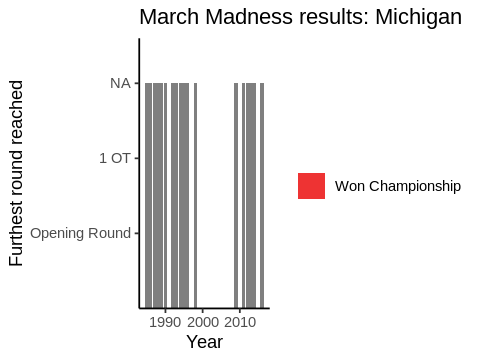

In [10]:
# YOUR SOLUTION HERE 
#ncaa$Round <- factor(ncaa$Round, levels = c("Opening Round", "Round of 64", "Round of 32", "Sweet Sixteen",
#"Elite Eight", "National Semifinals", "National Championship"))
#ncaa$Round <- ordered(ncaa$Round)
#ncaa$Year <- as.numeric(format(mdy(ncaa$Date), format = "%Y"), ordered=TRUE)
#ncaa %>% filter(Winner == "Michigan") %>%
 # group_by(Year) %>% summarize(Round = max(Round)) %>% mutate(champ = ifelse(Round == "National Championship", "Won Championship", NA)) %>%
 #  ggplot(aes(x=Year, y=Round, fill=champ)) + 
 # geom_col(aes = options(repr.plot.width = 10, repr.plot.height = 10)) + scale_fill_discrete(breaks = "Won Championship", name = "") +
  #    ylim(c("Opening Round", "Round of 64", "Round of 32", "Sweet Sixteen", "Elite Eight",
  #  "National Semifinals", "National Championship")) + scale_x_discrete(name="Year", limits=c(1990,2000,2010)) + 
  #  ylab("Furthest Round Reached") + ggtitle("March Madness Results: Michigan") 
round.levels <- filter(ncaa, Winner == "Michigan" | Loser == "Michigan", year(mdy(Date)) == 1989) %>% pull
round.levels <- c("Opening Round", round.levels)
ncaa.ch <- ncaa %>% filter(Round == "National Championship") %>% mutate(Loser = NA, Round = "Champion")
school <- "Michigan"
p <- ncaa %>% mutate(Date = mdy(Date), year = year(Date),
Round = factor(Round, levels = round.levels, ordered=T)) %>%
  filter(Winner == school | Loser == school) %>%
  mutate(champion = Round == "National Championship" & Winner == school) %>%
  group_by(year) %>% summarize(max.round = max(Round),
champ = ifelse(as.logical(max(champion)), "Won Championship", NA)) %>%
  print %>%
  ggplot(aes(x=year, y=max.round, fill=champ)) + geom_col(orientation="x") +
  scale_y_discrete(drop=F) +
  labs(x="Year", y="Furthest round reached", title="March Madness results: Michigan",
fill = "") + theme_classic() + scale_fill_manual(values = "#ee3333", limits = "Won Championship")
ggsave('michigan.png', p, width=8, height=5)
p

**1(b)** (2 points)
A [_Cinderella story_](https://www.ncaa.com/news/basketball-men/article/2021-03-01/11-greatest-march-madness-cinderella-stories) is a low-seeded team that goes deep in the NCAA tournament. For example, in 1986, the number 11 seed, Lousiana State, beat the number 6, 3, 2, and 1 seeds in succession, before ultimately losing in the semifinals:

```
# A tibble: 5 × 6
  Date       Round               Winner          `Winning Seed` Loser    Losin…¹
  <date>     <chr>               <chr>                    <dbl> <chr>      <dbl>
1 1986-03-13 Round of 64         Louisiana State             11 Purdue         6
2 1986-03-15 Round of 32         Louisiana State             11 Memphis        3
3 1986-03-20 Sweet Sixteen       Louisiana State             11 Georgia…       2
4 1986-03-22 Elite Eight         Louisiana State             11 Kentucky       1
5 1986-03-29 National Semifinals Louisville                   2 Louisia…      11
# … with abbreviated variable name ¹​`Losing Seed`
```

Define a team's "Cinderella index" to be the difference in seeding between the winning and losing team for each game that the team _won_. For example, the Cinderella index for the 1986 Louisiana State team shown above is $5 + 8 + 9 + 10 = 32$.

Make a plot showing the top ten teams with the highest Cinderella index.

Hint: the team with the highest Cinderella index is Lousiana State, 1986. The team with the second-highest is Villanova, 1985. There are actually 12 teams in the top 10 due to some ties.

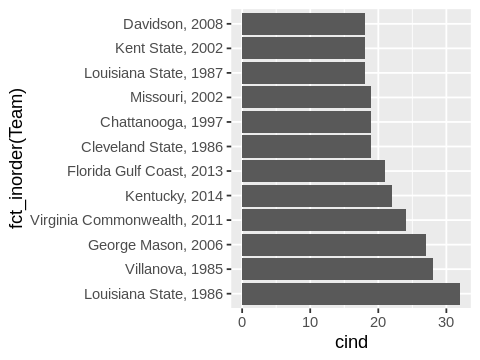

In [11]:
# YOUR SOLUTION HERE 
#ncaa %>% filter(`Winning Seed` > `Losing Seed`) %>% arrange(Year, Winner) %>% group_by(Year, Winner) %>%
 # summarize(`Cinderella Index`= sum(`Winning Seed` - `Losing Seed`)) %>% arrange(desc(`Cinderella Index`)) %>% head(13) %>% 
  #ggplot(aes(x=Winner, y=`Cinderella Index`, fill=Year)) + geom_col() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
ncaa %>% mutate(Date=mdy(Date)) %>%
  group_by(year=year(Date), Winner) %>%
  mutate(cind = `Winning Seed` - `Losing Seed`) %>%
  summarize(cind = sum(cind), .groups='drop') %>% arrange(desc(cind)) %>%
  mutate(Team = paste(Winner, year, sep=", ")) %>% top_n(10, cind) %>% ggplot +
  geom_col(aes(y=fct_inorder(Team), x=cind))

## Problem 2
The file `tweets.txt.gz` contains tweets from June, 2009. The file is in a special format. The first few lines are:

In [12]:
download.file("https://github.com/stats306/w23/tree/main/homeworks/hw8/tweets.txt.gz", "tweets.txt.gz")
readLines("tweets.txt.gz", n = 11) %>% writeLines








<!DOCTYPE html>
<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">
  <head>
    <meta charset="utf-8">


Each datum consists of a triple of lines marked `T`, `U` and `W` containing the time of the tweet, the user, and the message itself, respectively. Each triple is separated by an empty line.

**2(a) (0.5 point)**
Read `tweets.txt.gz` in and store it as an R data frame/tibble called `tweets1`. It should have two character columns and 1.03m rows:
```{r}
# A tibble: 1,039,879 × 2
   X1    X2                                                                     
   <chr> <chr>                                                                  
 1 T     "2009-06-11 00:00:03"                                                  
 2 U     "http://twitter.com/imdb"                                              
 3 W     "No Post Title"                                                        
 4 T     "2009-06-11 16:37:14"                                                  
 5 U     "http://twitter.com/ncruralhealth"                                     
 6 W     "No Post Title"                                                        
 7 T     "2009-06-11 16:56:23"                                                  
 8 U     "http://twitter.com/boydjones"                                         
 9 W     "listening to \"Big Lizard - The Dead Milkmen\" ♫ http://blip.fm/~81kw…
10 T     "2009-06-11 16:56:59"                                                  
# … with 1,039,869 more rows
```
(**Hint**: The `.gz` file extension indicates that this file is compressed to save space. You can load the table using the **usual `tidyverse` table loading commands**, as if it were a regular text file.

In [13]:
# YOUR SOLUTION HERE
url <- "https://raw.githubusercontent.com/stats306/w23/main/homeworks/hw8/tweets.txt.gz"
tweets1 <- read_tsv(url, col_names = FALSE)
colnames(tweets1) <- c("X1", "X2")
print(tweets1)

Rows: 1039879 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): X1, X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,039,879 × 2
   X1    X2                                                                     
   <chr> <chr>                                                                  
 1 T     "2009-06-11 00:00:03"                                                  
 2 U     "http://twitter.com/imdb"                                              
 3 W     "No Post Title"                                                        
 4 T     "2009-06-11 16:37:14"                                                  
 5 U     "http://twitter.com/ncruralhealth"                                     
 6 W     "No Post Title"                                                        
 7 T     "2009-06-11 16:56:23"                                                  
 8 U     "http://twitter.com/boydjones"                                         
 9 W     "listening to \"Big Lizard - The Dead Milkmen\" ♫ http://blip.fm/~81kw…
10 T     "2009-06-11 16:56:59"                                                  
# 

**2(b) (0.5 point)**
Next, convert `tweets1` so that it has three columns reflecting the three variables present in this data set. Store the resulting table in a variable called `tweets2`. The first rows of `tweets2` will now look like:
```
# A tibble: 3 x 3
  T                   U                                W                       
  <chr>               <chr>                            <chr>                   
1 2009-06-11 00:00:03 http://twitter.com/imdb          No Post Title           
2 2009-06-11 16:37:14 http://twitter.com/ncruralhealth No Post Title           
3 2009-06-11 16:56:23 http://twitter.com/boydjones     "listening to \"Big Liz…
```
(*Hint*: If you are having trouble getting this working on the full data set, try subsetting the table to a small number of rows in order to debug your code. Most likely you will use a function which requires each tripplet T, U, W to have the same row index.)

In [14]:
# YOUR SOLUTION HERE 
x <- as.vector(seq(from = 1, to = nrow(tweets1)/3, by = 1))
new_tweets1 <- head(tweets1, -1)
tweets2 <- new_tweets1 %>%  
    mutate(vector = rep(x, each = 3)) %>% 
    pivot_wider(names_from = X1, values_from = X2) %>% select(!vector) 
print(tweets2)

# A tibble: 346,626 × 3
   T                   U                                W                       
   <chr>               <chr>                            <chr>                   
 1 2009-06-11 00:00:03 http://twitter.com/imdb          "No Post Title"         
 2 2009-06-11 16:37:14 http://twitter.com/ncruralhealth "No Post Title"         
 3 2009-06-11 16:56:23 http://twitter.com/boydjones     "listening to \"Big Liz…
 4 2009-06-11 16:56:59 http://twitter.com/cameron987    "@beatrizchavez A dork?…
 5 2009-06-11 16:57:03 http://twitter.com/selenato      "@okaaaa 本当ね！2週間… 
 6 2009-06-11 16:57:30 http://twitter.com/nbeasley10    "Just got a chance to b…
 7 2009-06-11 16:57:31 http://twitter.com/littlewing333 "@kidhum and if an act …
 8 2009-06-11 16:57:33 http://twitter.com/lolcute       "mebbe U fetch http://t…
 9 2009-06-11 16:57:36 http://twitter.com/fr0st22       "I have broken 1,000 tw…
10 2009-06-11 16:57:59 http://twitter.com/mavellsyrup   "Food timmeeee :'D"     
# ℹ 346,61

**2(c) (0.5 point)**
Convert the `T` column to a properly formatted `datetime` object and give it (and the rest of the columns) an appropriate name. Also, strip off the leading `http://twitter.com/` from each user. Store the resulting table as `tweets3`. It will look like:
```
# A tibble: 346,627 × 3
   time                user          tweet                                      
   <dttm>              <chr>         <chr>                                      
 1 2009-06-11 00:00:03 imdb          "No Post Title"                            
 2 2009-06-11 16:37:14 ncruralhealth "No Post Title"                            
 3 2009-06-11 16:56:23 boydjones     "listening to \"Big Lizard - The Dead Milk…
 4 2009-06-11 16:56:59 cameron987    "@beatrizchavez A dork? NO way... you are.…
 5 2009-06-11 16:57:03 selenato      "@okaaaa 本当ね！2週間楽しみがありすぎわ、…
 6 2009-06-11 16:57:30 nbeasley10    "Just got a chance to buy All-Star tickets…
 7 2009-06-11 16:57:31 littlewing333 "@kidhum and if an act has pull and they d…
 8 2009-06-11 16:57:33 lolcute       "mebbe U fetch http://tinyurl.com/nz4fbr"  
 9 2009-06-11 16:57:36 fr0st22       "I have broken 1,000 twitter updates. Paaa…
10 2009-06-11 16:57:59 mavellsyrup   "Food timmeeee :'D"                        
# … with 346,617 more rows
```

In [15]:
# YOUR SOLUTION HERE 
tweets3 <- tweets2 %>% mutate(user = str_replace(U, "http://twitter.com/", "")) %>% 
    mutate(time = ymd_hms(T)) %>% rename(tweet = W) %>% 
    reframe(time, user, tweet) 
print(tweets3)

# A tibble: 346,626 × 3
   time                user          tweet                                      
   <dttm>              <chr>         <chr>                                      
 1 2009-06-11 00:00:03 imdb          "No Post Title"                            
 2 2009-06-11 16:37:14 ncruralhealth "No Post Title"                            
 3 2009-06-11 16:56:23 boydjones     "listening to \"Big Lizard - The Dead Milk…
 4 2009-06-11 16:56:59 cameron987    "@beatrizchavez A dork? NO way... you are.…
 5 2009-06-11 16:57:03 selenato      "@okaaaa 本当ね！2週間楽しみがありすぎわ、…
 6 2009-06-11 16:57:30 nbeasley10    "Just got a chance to buy All-Star tickets…
 7 2009-06-11 16:57:31 littlewing333 "@kidhum and if an act has pull and they d…
 8 2009-06-11 16:57:33 lolcute       "mebbe U fetch http://tinyurl.com/nz4fbr"  
 9 2009-06-11 16:57:36 fr0st22       "I have broken 1,000 twitter updates. Paaa…
10 2009-06-11 16:57:59 mavellsyrup   "Food timmeeee :'D"                        
# ℹ 346,616 more row

**2(d) (1 point)**
Create a plot that shows the tweet volume for each day of June 2009. For what **day of the month** was there the largest volume of tweets? Can you give an explanation for what caused this spike?

*Hint*: Try reading tweets on the day of highest volume around 11:00PM, and/or Google the date.

June 25th has the largest volume of tweets. This spike most likely was caused by both the death of Michael Jackson and Farrah Fawcett.

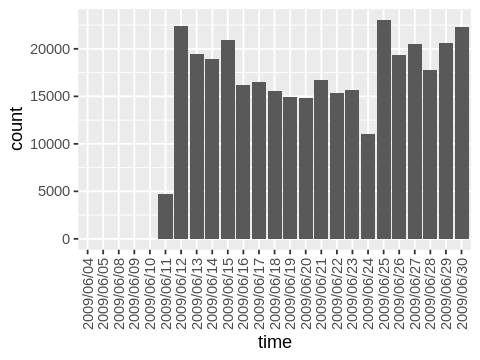

In [16]:
# YOUR SOLUTION HERE
tweets3 %>% mutate(time = format(as.POSIXct(time,format='%Y/%m/%d %H:%M:%S'),format='%Y/%m/%d')) %>% 
  group_by(time) %>%
  ggplot(aes(x=time)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

**2(e) (1 points)** One of the reason for the spike in 2(d) was related to a public figure in the music industry. On the day of highest volume in 2(d), what is the percentage of tweets that mentioned either **their first or last name**?

On the day of highest volume, June 25th, the percentage of tweets that mentioned Michael Jackson's first or last name is 3.88%.

In [17]:
# YOUR SOLUTION HERE 
#count <- tweets3 %>% mutate(time = format(as.POSIXct(time,format='%Y/%m/%d %H:%M:%S'),format='%Y/%m/%d')) %>% filter(time=='2009/06/25') %>%
 # select(tweet) %>% str_count('Michael|Jackson')
#tweets3 %>% mutate(time = format(as.POSIXct(time,format='%Y/%m/%d %H:%M:%S'),format='%Y/%m/%d')) %>% filter(time=='2009/06/25') %>%
 # select(tweet) %>% summarize(percent = count/n()*100)
tweets3 %>% mutate(day_of_month = mday(time)) %>%
  filter(day_of_month == 25) %>%
  mutate(is_mentioned = if_else(str_detect(tweet, 
regex('\\b(michael|jackson)[.,;]?\\b', ignore_case=T)), 1, 0)) %>%
  summarize(mj_pct = mean(is_mentioned))

mj_pct
<dbl>
0.02748469


# Challenge Problem: Writing a function

(2 points) A few weeks ago, the university announced that it was pushing the start of the winter semester [back by one week](https://www.michigandaily.com/news/administration/board-of-regents-approves-extended-winter-break/) to January 10, 2024. Assume that the winter semester will always begin on the second Wednesday in January. Write a function called `winter_start_date(year)` which takes a year and returns the date on which winter classes will commence:

    > winter_start_date(2024)
    2024-01-10
    > winter_start_date(3024)
    3024-01-14

In [ ]:
# YOUR SOLUTION HERE 
winter_start_date <- function(year){
  jan1 <- as.Date(ISOdate(year, 1, 1))
  weekday_jan1 <- weekdays(jan1)
  if (weekday_jan1 == "Monday"){
    wed = jan1 + days(9)
  }
  if (weekday_jan1 == "Tuesday"){
    wed = jan1 + days(8)
  }
  if (weekday_jan1 == "Wednesday"){
    wed = jan1 + days(7)
  }
  if(weekday_jan1 == "Thursday"){
    wed = jan1 + days(13)
  }
  if(weekday_jan1 == "Friday"){
    wed = jan1 + days(12)
  }
  if(weekday_jan1 == "Saturday"){
    wed = jan1 + days(11)
  }
  else if(weekday_jan1 == "Sunday"){
    wed = jan1 + days(10)
  }
  return(wed)
}
winter_start_date(2024)
winter_start_date(3024)

[1] "2024-01-10"

[1] "3024-01-14"